In [1]:
%config Completer.use_jedi = False

# Avaliação Módulo II

## Sobre o projeto

Faça um programa que:
1) Carregue os dados de um csv remoto, ex. csv do github, csv de uma base aberta qualquer ou API.  

2) Crie uma api que filtre esses dados e (depois do item 4) retorne o json dos dados filtrados.  

3) A partir dos dados filtrados você deve escolher uma variável quantitativa para agregar com um groupby e criar um csv e um json resposta, ambos devem ser persistidos.  

4) A partir dos dados filtrados você deve escolher um gráfico para fazer como por exemplo fizemos as gorgetas dadas por sexo ou dia da semana. Crie uma figura png ou jpeg resposta. 

5) Coloque sua resposta em um projeto novo no git e envie por e-mail. 

## Base de Dados

https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv

https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report-2021.csv

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
happiness_data_2019 = pd.read_csv('data/2019.csv')

countries_2019 = happiness_data_2019['Country or region'].unique()
happiness_data_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [4]:
happiness_data_2020 = pd.read_csv('data/2020.csv')

countries_2020 = happiness_data_2020['Country name'].unique()
happiness_data_2020.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [5]:
happiness_data_2021 = pd.read_csv('data/2021.csv')

countries_2021 = happiness_data_2021['Country name'].unique()
happiness_data_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [6]:
countries_in_all = list(set.intersection(*map(set, [countries_2019, countries_2020, countries_2021])))

# Tratamento de Dados

In [7]:
happiness_data_2019 = happiness_data_2019[happiness_data_2019['Country or region'].isin(countries_in_all)]
happiness_data_2019 = happiness_data_2019.drop(columns=['Overall rank'])
happiness_data_2019.rename(
    columns={
        'Country or region': 'Country name',
        'Score': 'Ladder score',
        'GDP per capita': 'Logged GDP per capita'
    },
    inplace=True
)

happiness_data_2019['year'] = 2019

happiness_data_2019['Regional indicator'] = happiness_data_2019['Country name']

happiness_data_2019

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Regional indicator
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Finland
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Denmark
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Norway
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Iceland
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Netherlands
...,...,...,...,...,...,...,...,...,...,...
149,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,2019,Malawi
150,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,2019,Yemen
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019,Rwanda
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019,Tanzania


In [8]:
region_dict = happiness_data_2021[['Country name', 'Regional indicator']].set_index('Country name').to_dict()['Regional indicator']
region_dict

{'Finland': 'Western Europe',
 'Denmark': 'Western Europe',
 'Switzerland': 'Western Europe',
 'Iceland': 'Western Europe',
 'Netherlands': 'Western Europe',
 'Norway': 'Western Europe',
 'Sweden': 'Western Europe',
 'Luxembourg': 'Western Europe',
 'New Zealand': 'North America and ANZ',
 'Austria': 'Western Europe',
 'Australia': 'North America and ANZ',
 'Israel': 'Middle East and North Africa',
 'Germany': 'Western Europe',
 'Canada': 'North America and ANZ',
 'Ireland': 'Western Europe',
 'Costa Rica': 'Latin America and Caribbean',
 'United Kingdom': 'Western Europe',
 'Czech Republic': 'Central and Eastern Europe',
 'United States': 'North America and ANZ',
 'Belgium': 'Western Europe',
 'France': 'Western Europe',
 'Bahrain': 'Middle East and North Africa',
 'Malta': 'Western Europe',
 'Taiwan Province of China': 'East Asia',
 'United Arab Emirates': 'Middle East and North Africa',
 'Saudi Arabia': 'Middle East and North Africa',
 'Spain': 'Western Europe',
 'Italy': 'Western E

In [9]:
happiness_data_2019['Regional indicator'] = happiness_data_2019['Regional indicator'].map(region_dict)
happiness_data_2019

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Regional indicator
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Western Europe
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Western Europe
...,...,...,...,...,...,...,...,...,...,...
149,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,2019,Sub-Saharan Africa
150,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,2019,Middle East and North Africa
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019,Sub-Saharan Africa
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019,Sub-Saharan Africa


In [10]:
columns_to_maintain = happiness_data_2019.columns.to_list()
columns_to_maintain

['Country name',
 'Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'year',
 'Regional indicator']

In [11]:
happiness_data_2020 = happiness_data_2020[happiness_data_2020['Country name'].isin(countries_in_all)]
happiness_data_2020['year'] = 2020
happiness_data_2020 = happiness_data_2020[columns_to_maintain]
happiness_data_2020

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Regional indicator
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,2020,Western Europe
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,2020,Western Europe
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,2020,Western Europe
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,2020,Western Europe
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,2020,Western Europe
...,...,...,...,...,...,...,...,...,...,...
146,Botswana,3.4789,9.711204,0.779122,58.924454,0.821328,-0.250394,0.777931,2020,Sub-Saharan Africa
147,Tanzania,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,2020,Sub-Saharan Africa
149,Rwanda,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,2020,Sub-Saharan Africa
150,Zimbabwe,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,2020,Sub-Saharan Africa


In [12]:
happiness_data_2021 = happiness_data_2021[happiness_data_2021['Country name'].isin(countries_in_all)]
happiness_data_2021['year'] = 2021
happiness_data_2021 = happiness_data_2021[columns_to_maintain]
happiness_data_2021

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Regional indicator
0,Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,2021,Western Europe
1,Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2021,Western Europe
2,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2021,Western Europe
3,Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673,2021,Western Europe
4,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2021,Western Europe
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,2021,Sub-Saharan Africa
145,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,2021,Sub-Saharan Africa
146,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167,2021,Sub-Saharan Africa
147,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,2021,Sub-Saharan Africa


# Juntar tabelas

In [13]:
happiness_data = pd.concat([
    happiness_data_2019,
    happiness_data_2020,
    happiness_data_2021
], ignore_index=True)
happiness_data

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Regional indicator
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Western Europe
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Western Europe
...,...,...,...,...,...,...,...,...,...,...
427,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,2021,Sub-Saharan Africa
428,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,2021,Sub-Saharan Africa
429,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167,2021,Sub-Saharan Africa
430,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,2021,Sub-Saharan Africa


In [16]:
happiness_data.to_csv('data/happiness.csv', index=False)

# Avaliação

In [17]:
happiness_df = pd.read_csv('https://raw.githubusercontent.com/Akaori/avaliacao_modulo_2/main/data/happiness.csv?token=AKZDFYVTEJJW7YENNRBQBYLBUKCE4')
happiness_df.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Regional indicator
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Western Europe
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Western Europe


In [18]:
filtered_df = happiness_df[happiness_df['year'] == 2021]
filtered_df

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Regional indicator
288,Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,2021,Western Europe
289,Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2021,Western Europe
290,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2021,Western Europe
291,Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673,2021,Western Europe
292,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2021,Western Europe
...,...,...,...,...,...,...,...,...,...,...
427,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,2021,Sub-Saharan Africa
428,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,2021,Sub-Saharan Africa
429,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167,2021,Sub-Saharan Africa
430,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,2021,Sub-Saharan Africa


In [24]:
grouped_df = filtered_df.groupby('Regional indicator').agg(score=('Ladder score', 'mean'))
grouped_df.reset_index(inplace=True)

In [35]:
grouped_df.to_csv('output/grouped.csv', index=False)

In [36]:
grouped_df.to_json('output/grouped.json')

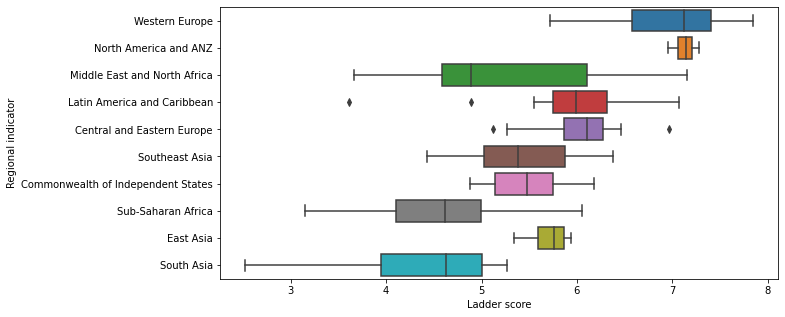

In [37]:
figure = plt.figure(figsize=(10, 5))

sns.boxplot(data=filtered_df, x='Ladder score', y='Regional indicator')

figure.savefig('output/grafico.jpg')